In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [4]:
accidents = pd.read_csv("db-output_accidents_all.csv", delimiter='|', low_memory=False)


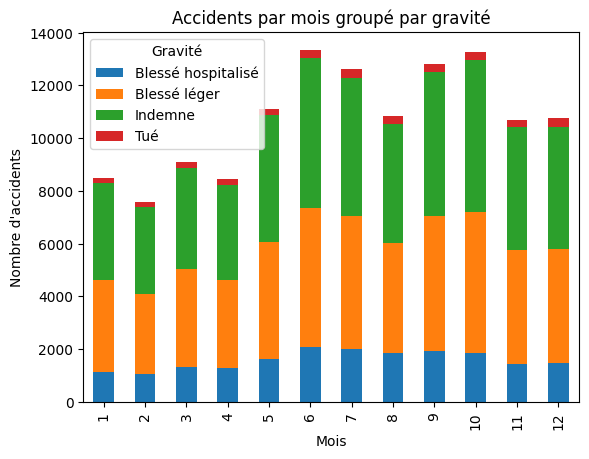

Gravité  Blessé hospitalisé  Blessé léger  Indemne  Tué
Mois                                                   
1                      1122          3520     3664  202
2                      1064          3042     3274  187
3                      1329          3714     3844  211
4                      1301          3322     3601  221
5                      1632          4439     4793  230
6                      2072          5291     5673  308
7                      1990          5054     5237  346
8                      1867          4173     4516  295
9                      1920          5120     5487  302
10                     1872          5342     5733  323
11                     1448          4325     4651  260
12                     1468          4339     4635  334

In [5]:
# Pivot table : Accident par mois groupé par gravité
accidents.pivot_table('Id Accident', index='Mois', columns='Gravité', aggfunc='count').plot(kind='bar', stacked=True)
plt.title("Accidents par mois groupé par gravité")
plt.xlabel("Mois")
plt.ylabel("Nombre d'accidents")
plt.show()

accidents.pivot_table('Id Accident', index='Mois', columns='Gravité', aggfunc='count')



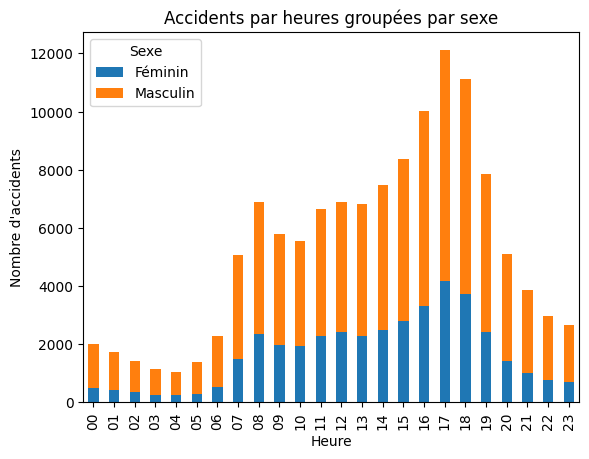

Sexe   Féminin  Masculin
Heure                   
00         496      1499
01         426      1308
02         327      1070
03         255       875
04         233       789
05         288      1103
06         513      1755
07        1479      3597
08        2351      4519
09        1977      3806
10        1933      3617
11        2278      4358
12        2409      4493
13        2257      4550
14        2484      5001
15        2780      5595
16        3304      6705
17        4172      7949
18        3704      7404
19        2402      5464
20        1396      3692
21         988      2884
22         765      2206
23         678      1957

In [ ]:
# Pivot table : Accident par heures groupées par sexe
dup = accidents.copy()
dup['Heure'] = dup['Heure'].apply(lambda x: x[:2])
dup.pivot_table('Id Accident', index='Heure', columns='Sexe', aggfunc='count').plot(kind='bar', stacked=True)
plt.title("Accidents par heures groupées par sexe")
plt.xlabel("Heure")
plt.ylabel("Nombre d'accidents")
plt.show()

dup.pivot_table('Id Accident', index='Heure', columns='Sexe', aggfunc='count')


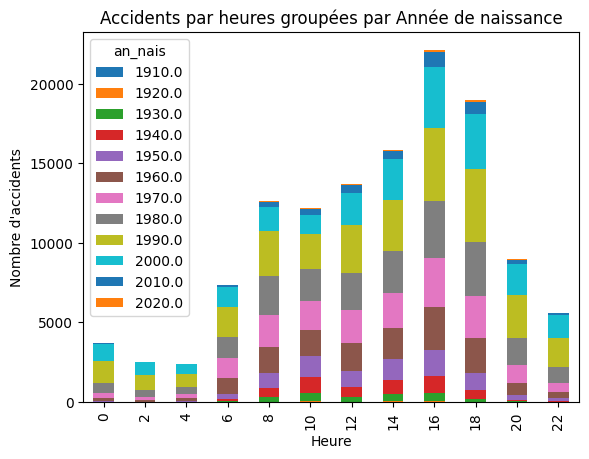

In [ ]:
# Pivot table : Accident par heures groupées par Année de naissance
# les heures sont groupées par tranche de 2 heures
# Les années de naissance sont groupées par tranche de 10 ans. la columne an_nais est un float
dup = accidents.copy()
dup['Heure'] = dup['Heure'].apply(lambda x: int(int(x[:2])/2)*2)
# Convert an_nais to int and group by 10 years, make sure to check NaN
dup['an_nais'] = dup['an_nais'].apply(lambda x: (int(x/10))*10 if not np.isnan(x) else x)
dup.pivot_table('Id Accident', index='Heure', columns='an_nais', aggfunc='count').plot(kind='bar', stacked=True)
plt.title("Accidents par heures groupées par Année de naissance")
plt.xlabel("Heure")
plt.ylabel("Nombre d'accidents")
plt.show()




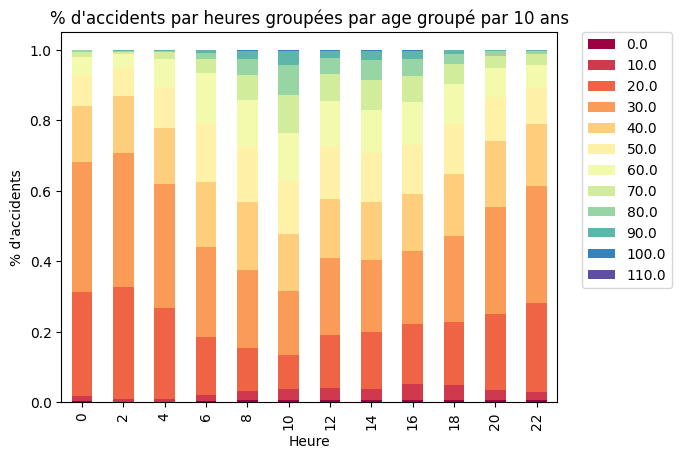

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.8141484 , 0.21968474, 0.30480584, 1.        ],
       [0.93302576, 0.39131103, 0.27197232, 1.        ],
       [0.98177624, 0.60738178, 0.34579008, 1.        ],
       [0.99469435, 0.80922722, 0.48696655, 1.        ],
       [0.99823145, 0.94517493, 0.65705498, 1.        ],
       [0.95578624, 0.98231449, 0.68004614, 1.        ],
       [0.82029988, 0.92756632, 0.61268743, 1.        ],
       [0.59100346, 0.8355248 , 0.64429066, 1.        ],
       [0.36001538, 0.71618608, 0.66551326, 1.        ],
       [0.212995  , 0.51141869, 0.73079585, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

In [ ]:
# Pivot table : % d'accidents par heures groupées par année de naissance
# les heures sont groupées par tranche de 2 heures
# Les années de naissance sont groupées par tranche de 10 ans. la columne an_nais est un float
dup = accidents.copy()
dup['Heure'] = dup['Heure'].apply(lambda x: int(int(x[:2])/2)*2)
# Convert an_nais to int and group by 10 years, make sure to check NaN
dup['an_nais'] = dup['an_nais'].apply(lambda x: (int(x/10))*10 if not np.isnan(x) else x)
# Calculate the age of the drivers at the time of the accident as we are in 2021
dup['age'] = 2020 - dup['an_nais']
# Generate colors for age
colors = plt.cm.Spectral(np.linspace(0, 1, 12))

dup.pivot_table('Id Accident', index='Heure', columns='age', aggfunc='count').apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, color=colors)
plt.title("% d'accidents par heures groupées par age groupé par 10 ans")
plt.xlabel("Heure")
plt.ylabel("% d'accidents")

# La légende à droite hors du graphique
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
colors